**Monash University**

**FIT5202 - Data processing for Big Data**

**Assignment 2: Detecting Linux system hacking activities Part B**

---

Name: Prajyot Nagrale

Student ID: 31132324

---

## 2. Consuming data using Kafka (10%)
In this task, we will implement multiple Apache Kafka consumers to consume the data from
task 1.
Important :
  In this task, use Kafka consumer to consume the data from task 1.
  Do not use Spark in this task
  
### 2.2 Memory Event Consumer (5%)
Write a python program that consumes the memory events using kafka consumer, visualise
the record counts in real time. Save the file as
Assignment-2B-Task2_memory_consumer.ipynb .

Your program should get the count of records arriving in the last 2 minutes ( use processing
time ) for each machine , and use line charts to visualise .

Hint - x-axis can be used to represent the timeline, while y-axis can be used to
represent the count; each machine’s line data can be represented in different color
legends



Import

In [2]:
# import statements
from time import sleep # Import sleep
from kafka import KafkaConsumer # Import kafka consumer
import datetime as dt# Import datatime
import matplotlib # Import matlab for graph
import matplotlib.pyplot as plt # Import for graph
import json  # Import Json
from datetime import datetime # Import  datatime
# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook
from pyspark.sql.types import * # Import all datatype

In [3]:
topic = 'memory' # topic name as process

Below function will connect to the kafka producer for an ip

In [4]:
def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=20000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

Create dimentions for graph

In [5]:
def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Each Machine count in memory data') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Count')
        ax.set_ylim(30,180) 
        ax.set_yticks([30, 60, 90, 120, 150, 180])
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))

Below function will read the data from kafka and will take the records for each machine and create line graph for each machine for the number of records for them. It will create different colour lines for each machines. 

a)  The below code will take the value for each machine and save in a list

    if value['machine'] == 4:
            machine_4.append(value)
        # append data for machine 5
        elif value['machine'] == 5:
            machine_5.append(value)
        # append data for machine 6
        elif value['machine'] == 6:
            machine_6.append(value)
        # append data for machine 7
        elif value['machine'] == 7:
            machine_7.append(value)
        # append data for machine 8
        elif value['machine'] == 8:
            machine_8.append(value)

b) The below code will create the count for each records

        x.append(datetime.utcfromtimestamp(end_time).strftime('%H:%M:%S'))
                y_4.append(len(machine_4))
                y_5.append(len(machine_5))
                y_6.append(len(machine_6))
                y_7.append(len(machine_7))
                y_8.append(len(machine_8))
                
c) The below code will create line graph for each machine

                ax.plot(x, y_4, label = 'Machine 4')
                ax.plot(x, y_5, label = "Machine 5")
                ax.plot(x, y_6, label = "Machine 6")
                ax.plot(x, y_7, label = "Machine 7")
                ax.plot(x, y_8, label = "Machine 8")

In [6]:
def consume_messages(consumer, fig, ax):
    try:
        x = []# empty list
        y_4, y_5, y_6, y_7, y_8 = [], [], [], [], []# empty list
        machine_4, machine_5, machine_6, machine_7, machine_8 = [], [], [], [], []

        start_time = int(dt.datetime.now().timestamp()) # current datetime

        for message in consumer:
            data1 = message.value.decode('utf-8') # decode the datatime
            data = json.loads(data1) #convert the json format
            # will create a block of 20 seconds and total  blocks for 2 mins
            end_time = start_time + 20
            # append data for machine 4
            if data['machine'] == 4:
                machine_4.append(data)
            # append data for machine 5
            if data['machine'] == 5:
                machine_5.append(data)
            # append data for machine 6
            if data['machine'] == 6:
                machine_6.append(data)
            # append data for machine 7
            if data['machine'] == 7:
                machine_7.append(data)
            # append data for machine 8
            if data['machine'] == 8:
                machine_8.append(data)
            # check the length of each each machine for given in 20 seconds
            if data['ts'] >= end_time:
                x.append(datetime.utcfromtimestamp(end_time).strftime('%H:%M:%S'))
                y_4.append(len(machine_4))
                y_5.append(len(machine_5))
                y_6.append(len(machine_6))
                y_7.append(len(machine_7))
                y_8.append(len(machine_8))
                # create line graph for each machine
                ax.clear()
                ax.plot(x, y_4, label = 'Machine 4', color = 'b')
                ax.plot(x, y_5, label = "Machine 5", color = 'r')
                ax.plot(x, y_6, label = "Machine 6", color = 'g')
                ax.plot(x, y_7, label = "Machine 7", color = 'y')
                ax.plot(x, y_8, label = "Machine 8", color = 'c')
                # graphs
                ax.set_xlabel('Time')
                ax.set_ylabel('Count')
                ax.set_ylim(30,180) 
                ax.set_yticks([30, 60, 90, 120, 150, 180])
                fig.canvas.draw()
                if len(y_4) > 6:
                    # remove first value of list
                    x.pop(0)
                    y_4.pop(0)
                    y_5.pop(0)
                    y_6.pop(0)
                    y_7.pop(0)
                    y_8.pop(0)

                machine_4, machine_5, machine_6, machine_7, machine_8 = [], [], [], [], []
                start_time = end_time # go to the next batch
        plt.close('all')
    except Exception as ex:
        print(str(ex))

<IPython.core.display.Javascript object>


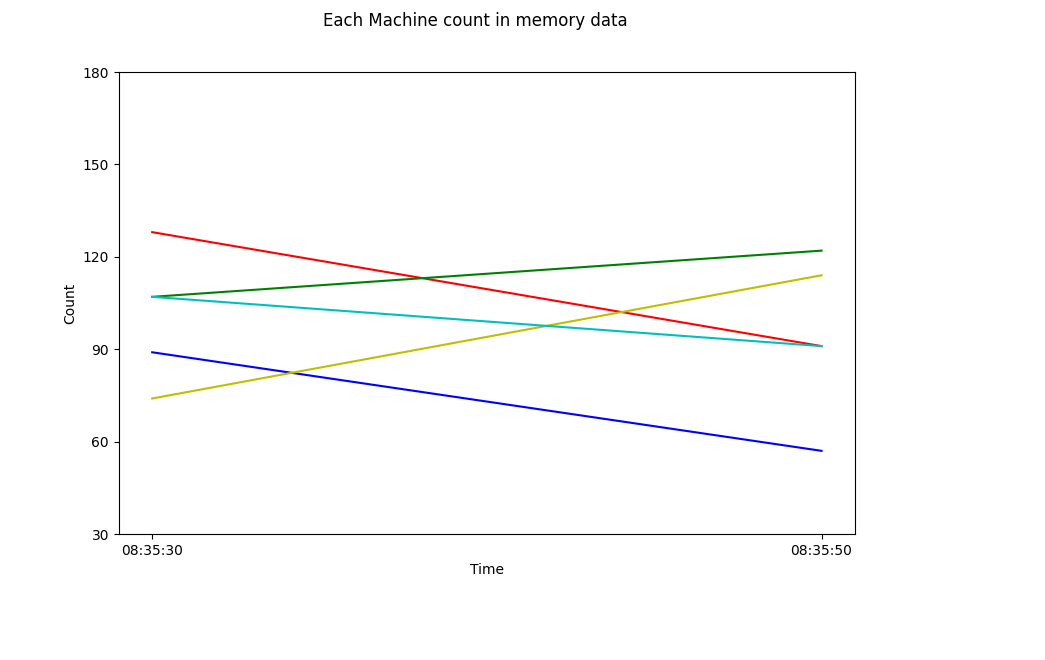

KeyboardInterrupt: 

In [7]:
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer() # read the data from the kafka 
    fig, ax = init_plots() # dimension for graph
    consume_messages(consumer, fig, ax)  # create graph   

### LABEL: 

Machine 4: Blue

Machine 5: Red

Machine 6: Green

Machine 7: Yellow

Machine 8: Cyan

From the above line graph we are able to see that the different machine has different no of records for at each interval of 2 minutes. In the above graph each block is of 20 seconds and their are 6 blocks which consist of total 2 mins. We are also able to see that the count is between 30 to 60 for each machine. 